In [1]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
werewolf_df = pd.read_csv("Resources/werewolf_data.csv")
werewolf_df.head()

,lat,lng,zip,Emergency Reason,Town/City,Date,Moon Phase
0,40.297876,-75.581294,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,2015-12-10,0.99
1,40.258061,-75.264680,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,2015-12-10,0.99
2,40.121182,-75.351975,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,2015-12-10,0.99
3,40.116153,-75.343513,19401.0,EMS: CARDIAC EMERGENCY,NORRISTOWN,2015-12-10,0.99
4,40.251492,-75.603350,NaN,EMS: DIZZINESS,LOWER POTTSGROVE,2015-12-10,0.99


In [3]:
narrowed_phases = werewolf_df.loc[(werewolf_df["Moon Phase"]== 0.0)|(werewolf_df["Moon Phase"]== 0.25)|(werewolf_df["Moon Phase"]== 0.5)|(werewolf_df["Moon Phase"]== 0.75),:]

narrowed_phases["Moon Phase"].value_counts()

0.50    33278
0.00    16514
0.75     4636
0.25     3208
Name: Moon Phase, dtype: int64

In [4]:

group_moon_date = narrowed_phases.groupby(["Moon Phase", "Date"])
group_counted = group_moon_date["Emergency Reason"].count()
group_counted.head()


group_counted_df = pd.DataFrame(group_counted)
group_counted_df.reset_index(inplace=True)
group_counted_df

,Moon Phase,Date,Emergency Reason
0,0.00,2015-12-12,402
1,0.00,2016-02-09,377
2,0.00,2016-04-08,367
3,0.00,2016-05-07,366
4,0.00,2016-07-05,383
...,...,...,...
136,0.75,2018-09-03,325
137,0.75,2018-11-30,420
138,0.75,2019-03-28,412
139,0.75,2019-07-25,433


In [5]:
calls_in_day = []


Phase_Names = ["New Moon","First Quarter", "Full Moon", "Last Quarter"]
Moon_Phases = [0, 0.25, 0.5, 0.75]

for phase in Moon_Phases:
    
    calls = group_counted_df.loc[group_counted_df['Moon Phase'] == phase,'Emergency Reason']
    calls_in_day.append(calls)

    
    
    
calls_in_day    

# # plt.boxplot(group_counted_df)
# # plt.show()
# narrowed_phases.boxplot(, by="Moon Phase", figsize=(20, 10))

[0     402
 1     377
 2     367
 3     366
 4     383
 5     402
 6     408
 7     317
 8     448
 9     478
 10    369
 11    361
 12    376
 13    370
 14    492
 15    425
 16    343
 17    410
 18    430
 19    490
 20    422
 21    406
 22    318
 23    418
 24    477
 25    290
 26    470
 27    474
 28    464
 29    344
 30    429
 31    454
 32    387
 33    398
 34    354
 35    427
 36    424
 37    341
 38    350
 39    451
 40    402
 Name: Emergency Reason, dtype: int64,
 41    286
 42    387
 43    418
 44    341
 45    402
 46    448
 47    538
 48    388
 Name: Emergency Reason, dtype: int64,
 49     321
 50     286
 51     657
 52     342
 53     340
       ... 
 124    347
 125    442
 126    412
 127    437
 128    418
 Name: Emergency Reason, Length: 80, dtype: int64,
 129    375
 130    309
 131    354
 132    426
 133    450
 134    395
 135    380
 136    325
 137    420
 138    412
 139    433
 140    357
 Name: Emergency Reason, dtype: int64]

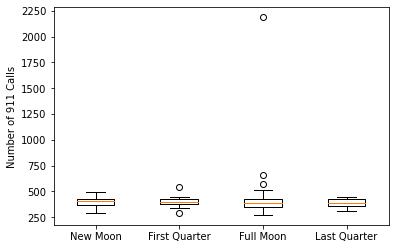

In [6]:
fig1, ax1 = plt.subplots()

ax1.set_ylabel("Number of 911 Calls")
ax1.boxplot(calls_in_day,labels=Phase_Names)
plt.show()

In [7]:
group1 = group_counted_df[group_counted_df["Moon Phase"] == 0]["Emergency Reason"]
group2 = group_counted_df[group_counted_df["Moon Phase"] == .25]["Emergency Reason"]
group3 = group_counted_df[group_counted_df["Moon Phase"] == .5]["Emergency Reason"]
group4 = group_counted_df[group_counted_df["Moon Phase"] == 0.75]["Emergency Reason"]

# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=0.15224448977873906, pvalue=0.9280957571044087)

In [8]:
bins = [0,0.2,0.4,0.6,0.8,1]
group_names = ["New Moon End", "Waxing", "Full Moon Area", "Waning", "New Moon Begin"]
werewolf_df["Phasing"] = pd.cut(werewolf_df["Moon Phase"], bins, labels=group_names, include_lowest=True)
werewolf_df

,lat,lng,zip,Emergency Reason,Town/City,Date,Moon Phase,Phasing
0,40.297876,-75.581294,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,2015-12-10,0.99,New Moon Begin
1,40.258061,-75.264680,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,2015-12-10,0.99,New Moon Begin
2,40.121182,-75.351975,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,2015-12-10,0.99,New Moon Begin
3,40.116153,-75.343513,19401.0,EMS: CARDIAC EMERGENCY,NORRISTOWN,2015-12-10,0.99,New Moon Begin
4,40.251492,-75.603350,NaN,EMS: DIZZINESS,LOWER POTTSGROVE,2015-12-10,0.99,New Moon Begin
...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,19403.0,Traffic: VEHICLE ACCIDENT -,EAST NORRITON,2020-07-29,NaN,NaN
663518,40.136306,-75.428697,19403.0,EMS: GENERAL WEAKNESS,LOWER PROVIDENCE,2020-07-29,NaN,NaN
663519,40.013779,-75.300835,19041.0,EMS: VEHICLE ACCIDENT,LOWER MERION,2020-07-29,NaN,NaN
663520,40.121603,-75.351437,19401.0,Fire: BUILDING FIRE,NORRISTOWN,2020-07-29,NaN,NaN


In [9]:
# filtered_df = werewolf_df.loc[(werewolf_df["Phasing"]== "New Moon Begin")|(werewolf_df["Phasing"]== "Waxing")|(werewolf_df["Phasing"]== "Full Moon Area")|(werewolf_df["Phasing"]== "Waning")|(werewolf_df["Phasing"]== "New Moon End")]
filtered_df = werewolf_df.dropna()

group_moon_phasing = filtered_df.groupby(["Phasing", "Date"])
group_moon_phasing.head()
group_counted = group_moon_phasing["Emergency Reason"].count()
group_counted.head()


group_counted_df = pd.DataFrame(group_counted)
group_counted_df.reset_index(inplace=True)
group_counted_df.head()

clean_counted_df = group_counted_df.loc[group_counted_df["Emergency Reason"]!= 0,:]
group_counted_df
# clean_counted_df["Phasing"].value_counts()

Full Moon Area    432
New Moon Begin    320
New Moon End      318
Waning            204
Waxing            203
Name: Phasing, dtype: int64

In [10]:
calls_in_day = []


Phase_Names = ["New Moon End","Waxing", "Full Moon Area", "Waning", "New Moon Begin"]
Moon_Phases = ["New Moon End","Waxing", "Full Moon Area", "Waning", "New Moon Begin"]

for phase in Moon_Phases:
    
    calls = clean_counted_df.loc[clean_counted_df['Phasing'] == phase,'Emergency Reason']
    calls_in_day.append(calls)


In [11]:
calls_in_day

[2       334
 3       279
 4       385
 5       380
 6       343
        ... 
 1450    352
 1451    327
 1452    289
 1453    346
 1454    360
 Name: Emergency Reason, Length: 318, dtype: int64,
 1485    306
 1486    239
 1487    236
 1488    376
 1515    258
        ... 
 2905    389
 2932    408
 2933    384
 2934    373
 2935    342
 Name: Emergency Reason, Length: 203, dtype: int64,
 2966    399
 2967    430
 2968    386
 2969    266
 2970    258
        ... 
 4417    353
 4418    428
 4419    375
 4420    281
 4421    404
 Name: Emergency Reason, Length: 432, dtype: int64,
 4451    303
 4452    268
 4453    236
 4454    299
 4455    284
        ... 
 5872    355
 5899    424
 5900    421
 5901    386
 5902    459
 Name: Emergency Reason, Length: 204, dtype: int64,
 5908    100
 5909    332
 5933    345
 5934    373
 5935    375
        ... 
 7380    363
 7381    325
 7382    416
 7383    346
 7384    290
 Name: Emergency Reason, Length: 320, dtype: int64]

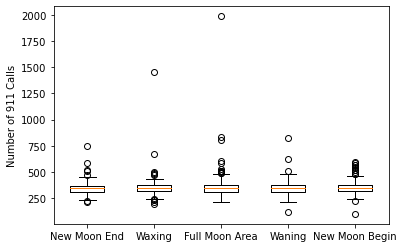

In [12]:
fig1, ax1 = plt.subplots()

ax1.set_ylabel("Number of 911 Calls")
ax1.boxplot(calls_in_day,labels=Phase_Names)
plt.show()

In [13]:
group1 = clean_counted_df[clean_counted_df["Phasing"] == "New Moon Begin"]["Emergency Reason"]
group2 = clean_counted_df[clean_counted_df["Phasing"] == "Waxing"]["Emergency Reason"]
group3 = clean_counted_df[clean_counted_df["Phasing"] == "Full Moon Area"]["Emergency Reason"]
group4 = clean_counted_df[clean_counted_df["Phasing"] == "Waning"]["Emergency Reason"]
group5 = clean_counted_df[clean_counted_df["Phasing"] == "New Moon End"]["Emergency Reason"]

# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5)


F_onewayResult(statistic=0.796634712485463, pvalue=0.5273156323044574)

In [14]:
# BINNING ISSUE MAYBE 0.8 --> 1 

In [15]:
group4

4451    303
4452    268
4453    236
4454    299
4455    284
       ... 
5872    355
5899    424
5900    421
5901    386
5902    459
Name: Emergency Reason, Length: 204, dtype: int64

In [16]:

group_moon_date = narrowed_phases.groupby(["Moon Phase"])
group_counted = group_moon_date["Emergency Reason"].count()
group_counted.head()


group_counted_df = pd.DataFrame(group_counted)
group_counted_df.reset_index(inplace=True)
group_counted_df.head(20)

,Moon Phase,Emergency Reason
0,0.00,16514
1,0.25,3208
2,0.50,33278
3,0.75,4636


In [17]:
critical_value = stats.chi2.ppf(q = 0.95, df = 3)

In [18]:
critical_value

7.814727903251179

In [19]:
group_counted_df["Emergency Reason"].sum()

57636

In [20]:
average = 57636/4

In [21]:
group_counted_df["expected"] = average

In [22]:
group_counted_df

,Moon Phase,Emergency Reason,expected
0,0.00,16514,14409.0
1,0.25,3208,14409.0
2,0.50,33278,14409.0
3,0.75,4636,14409.0


In [23]:
stats.chisquare(group_counted_df['Emergency Reason'], group_counted_df["expected"])

Power_divergenceResult(statistic=40352.84308418349, pvalue=0.0)

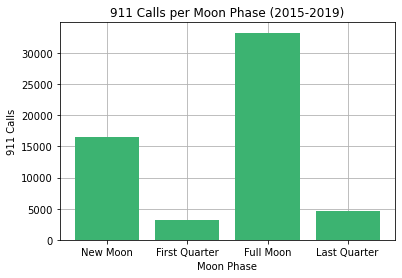

<Figure size 432x288 with 0 Axes>

In [24]:
fig, ax = plt.subplots()
y_values = group_counted_df["Emergency Reason"]
labels = ["New Moon", "First Quarter", "Full Moon","Last Quarter"]
plt.bar(labels, y_values, color="mediumseagreen", align="center")
plt.title("911 Calls per Moon Phase (2015-2019)")
plt.xlabel("Moon Phase")
plt.ylabel("911 Calls")
plt.grid()
ax.set_axisbelow(True)
plt.savefig('Images/Calls_per_phase_Alex.png')
plt.show()


In [25]:
filtered_df = werewolf_df.dropna()

group_moon_phasing = filtered_df.groupby("Phasing")
group_moon_phasing.head()
group_counted = group_moon_phasing["Emergency Reason"].count()
group_counted.head()


group_counted_df = pd.DataFrame(group_counted)
group_counted_df.reset_index(inplace=True)
# group_counted_df.head()

clean_counted_df = group_counted_df.loc[group_counted_df["Emergency Reason"]!= 0,:]
group_counted_df
clean_counted_df

,Phasing,Emergency Reason
0,New Moon End,109396
1,Waxing,71219
2,Full Moon Area,152880
3,Waning,70832
4,New Moon Begin,112182


In [26]:


expected = clean_counted_df["Emergency Reason"].sum()/5
clean_counted_df["expected"] = expected

In [27]:

critical_value = stats.chi2.ppf(q = 0.95, df = 4)

In [28]:
critical_value

9.487729036781154

In [29]:
stats.chisquare(clean_counted_df['Emergency Reason'], clean_counted_df["expected"])

Power_divergenceResult(statistic=45087.20185708284, pvalue=0.0)

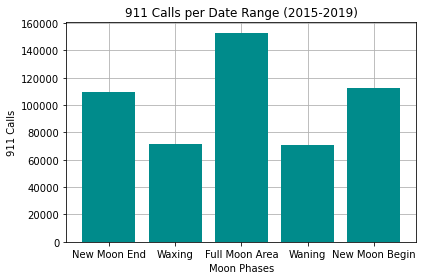

<Figure size 432x288 with 0 Axes>

In [30]:
fig, ax = plt.subplots()
y_values = clean_counted_df["Emergency Reason"]
labels = clean_counted_df["Phasing"]
plt.bar(labels, y_values, color="darkcyan", align="center", )
plt.title("911 Calls per Date Range (2015-2019)")
plt.xlabel("Moon Phases")
plt.ylabel("911 Calls")
plt.grid()
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()
plt.savefig('Images/Calls_per_daterange_Alex.png')